<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

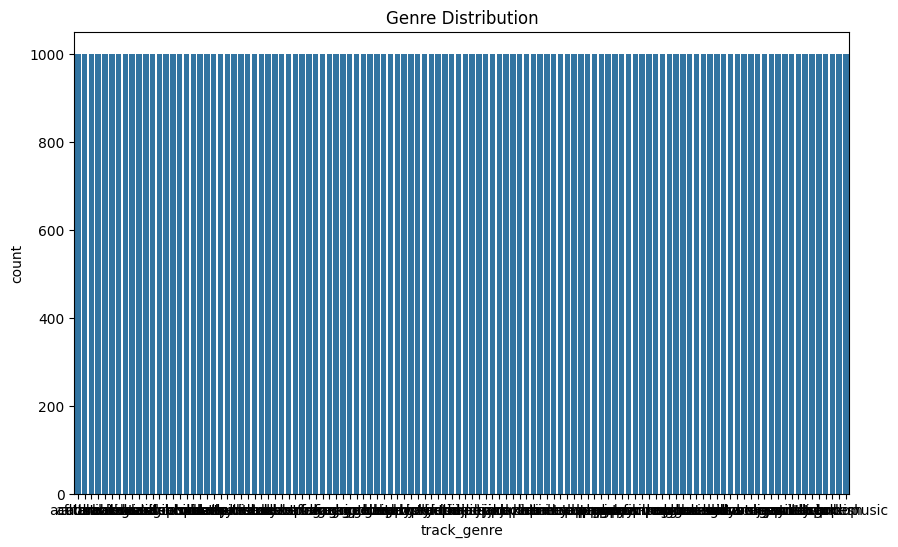

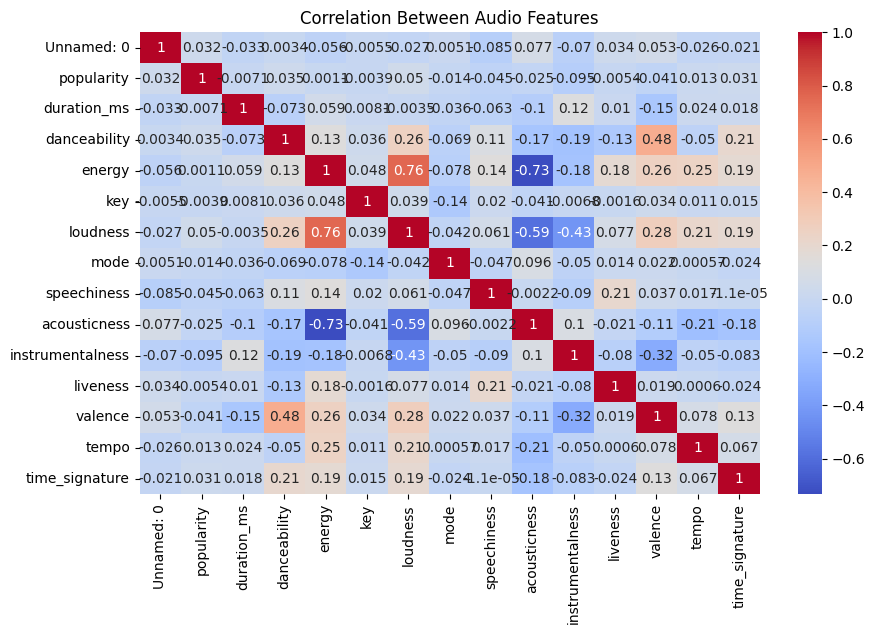

Training data shape: (91200, 9)
Test data shape: (22800, 9)


In [12]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
df = pd.read_csv('../data/dataset.csv')

# Basic statistics and dataset information
print(df.info())
print(df.describe())

# Distribution of genres
plt.figure(figsize=(10, 6))
sns.countplot(x='track_genre', data=df)
plt.title('Genre Distribution')
plt.show()

numeric_df = df.select_dtypes(include=[float, int])
# Correlation heatmap between audio features
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Audio Features')
plt.show()

# Feature scaling for better model performance
features = ['danceability', 'energy','loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

# Label encoding for the genre
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['track_genre'])

# Train/test split for model training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


In [9]:
!pip install pandas seaborn matplotlib scikit-learn
!pip install tensorflow